In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Unicorn_Companies.csv')

In [3]:
data

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [4]:
data.shape

(1074, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   int64 
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1057 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1074 non-null   object
dtypes: int64(2), object(8)
memory usage: 84.0+ KB


In [6]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

In [8]:
data['Funding'] = data['Funding'].str.replace('$', '')

In [9]:
def convert_funding(value):
    if value == 'Unknown':
        return None
    elif value.endswith('B'):
        return float(value[:-1]) * 1000
    elif value.endswith('M'):
        return float(value[:-1])
    else:
        return float(value)

data['Funding'] = data['Funding'].apply(convert_funding)

In [11]:
data

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7000.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2000.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,2000.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4000.0,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,379.0,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,990.0,"58.com, Tencent Holdings"
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,80.0,"Xingwang Investment Management, China Capital ..."
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,792.0,"IAG Capital Partners, Augmentum Fintech, North..."


In [13]:
data['Year of Joining'] = data['Date Joined'].dt.year

In [16]:
data['Time To Unicorn'] = data['Year of Joining'] - data['Year Founded']

In [18]:
data

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year of Joining,Time To Unicorn
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000.0,"Sequoia Capital China, SIG Asia Investments, S...",2017,5
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7000.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,10
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2000.0,"Tiger Global Management, Sequoia Capital China...",2018,10
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,2000.0,"Khosla Ventures, LowercaseCapital, capitalG",2014,4
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4000.0,"Institutional Venture Partners, Sequoia Capita...",2011,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,379.0,"K2 Ventures, Matrix Partners China, IDG Capital",2017,5
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,990.0,"58.com, Tencent Holdings",2017,2
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,80.0,"Xingwang Investment Management, China Capital ...",2021,3
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,792.0,"IAG Capital Partners, Augmentum Fintech, North...",2021,16


#### **Time taken to become Unicorn per Industry**

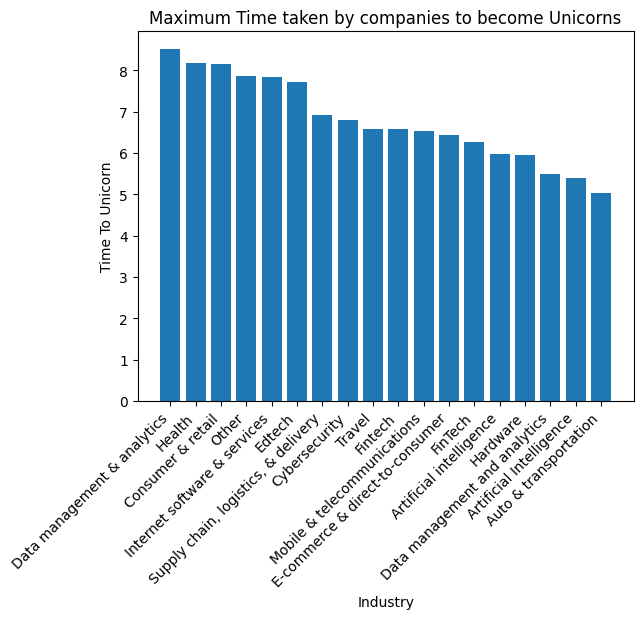

In [63]:
time_taken = data.groupby('Industry')['Time To Unicorn'].mean().sort_values(ascending=False)
time_taken_unsorted = data.groupby('Industry')['Time To Unicorn'].mean()
plt.bar(time_taken.index, time_taken.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Time To Unicorn')
plt.title('Maximum Time taken by companies to become Unicorns')
plt.xlabel('Industry')
plt.show()

#### **Average Valuation per Industry**

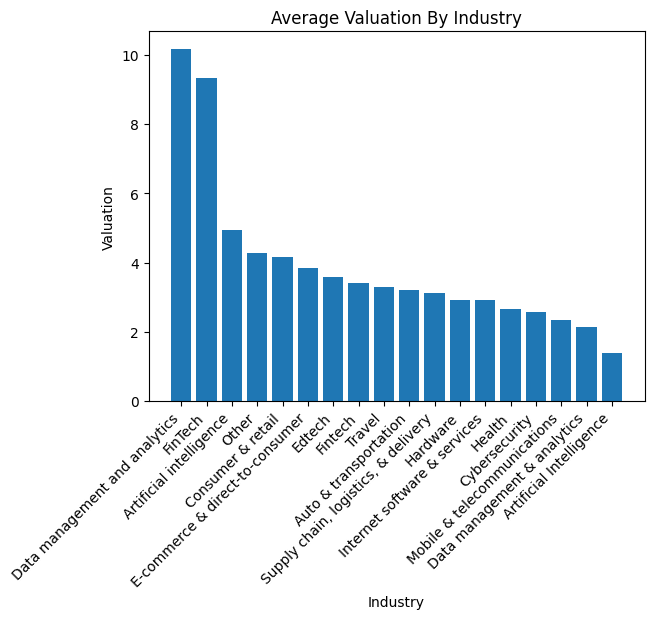

In [67]:
max_valuation = data.groupby('Industry')['Valuation'].mean().sort_values(ascending=False)
max_valuation_unsorted = data.groupby('Industry')['Valuation'].mean()
plt.bar(max_valuation.index, max_valuation.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Valuation')
plt.title('Average Valuation By Industry')
plt.xlabel('Industry')
plt.show()

In [28]:
max_valuation_unsorted

Industry
Artificial Intelligence                  3
Artificial intelligence                180
Auto & transportation                   11
Consumer & retail                       38
Cybersecurity                            9
Data management & analytics              5
Data management and analytics           38
E-commerce & direct-to-consumer        100
Edtech                                  22
FinTech                                 95
Fintech                                 46
Hardware                                12
Health                                  13
Internet software & services            40
Mobile & telecommunications              9
Other                                  100
Supply chain, logistics, & delivery     39
Travel                                  10
Name: Valuation, dtype: int64

#### **Valuation vs Average Time Taken by Industry to become Unicorn**

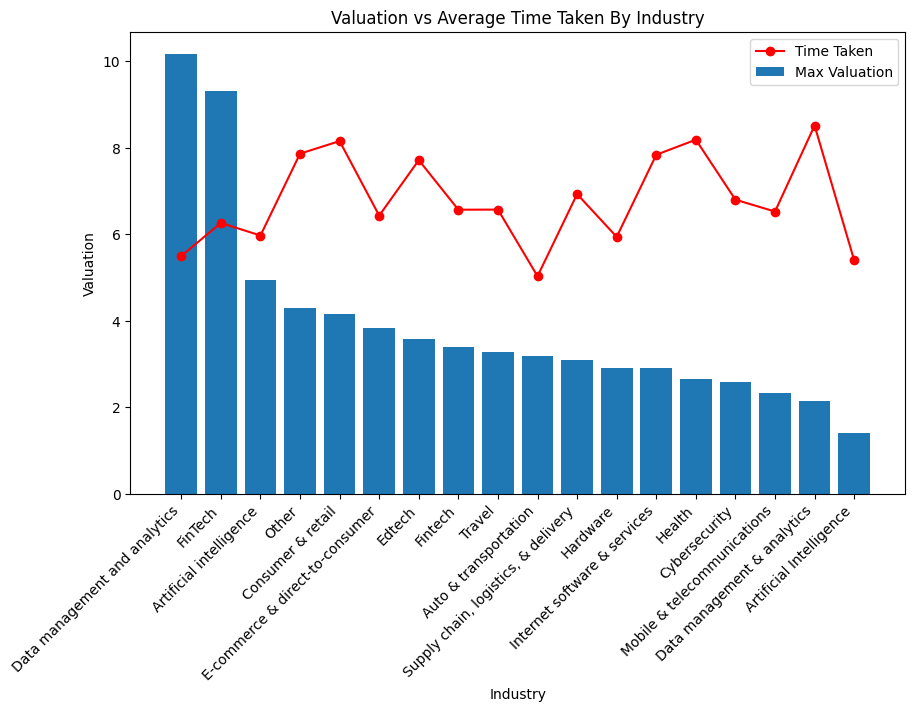

In [65]:

time_taken = time_taken_unsorted.reindex(max_valuation.index)

plt.figure(figsize=(10, 6)) 


plt.bar(max_valuation.index, max_valuation.values, label='Max Valuation')


plt.plot(time_taken.index, time_taken.values, color='red', marker='o', linestyle='-', label='Time Taken')

plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Valuation')
plt.title('Valuation vs Average Time Taken By Industry')
plt.xlabel('Industry')


plt.legend()

plt.show()

In [40]:
data['Continent'].value_counts()

Continent
North America    588
Asia             310
Europe           144
South America     21
Oceania            8
Africa             3
Name: count, dtype: int64

In [44]:
data_NorthAmerica = data[data['Continent'] == 'North America']

In [45]:
data_Asia = data[data['Continent'] == 'Asia']

In [46]:
data_Europe = data[data['Continent'] == 'Europe']

In [47]:
data_South_America = data[data['Continent'] == 'South America']

In [48]:
data_Africa = data[data['Continent'] == 'Africa']

In [49]:
data_Oceania = data[data['Continent'] == 'Oceania']

## **<p align = "center">Analysis for North America </p>**

#### **Time taken to become Unicorn per Industry**

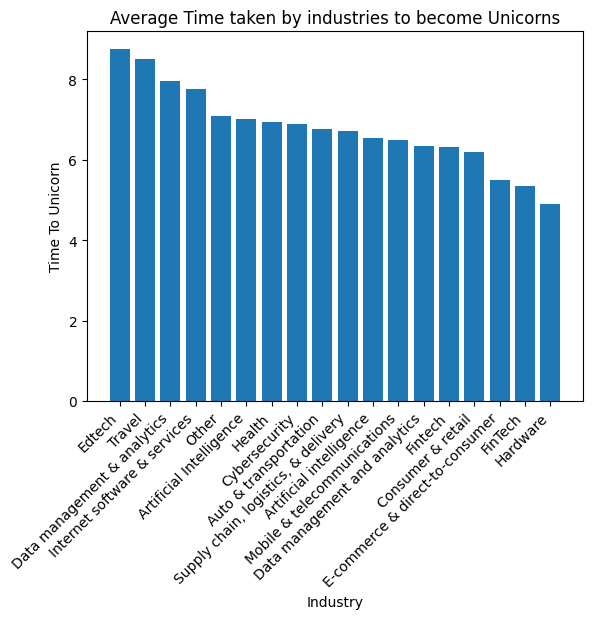

In [60]:
time_taken_NorthAmerica = data_NorthAmerica.groupby('Industry')['Time To Unicorn'].mean().sort_values(ascending=False)


plt.bar(time_taken_NorthAmerica.index, time_taken_NorthAmerica.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Time To Unicorn')
plt.title('Average Time taken by industries to become Unicorns')
plt.xlabel('Industry')
plt.show()


#### **Average Valuation of Industries**

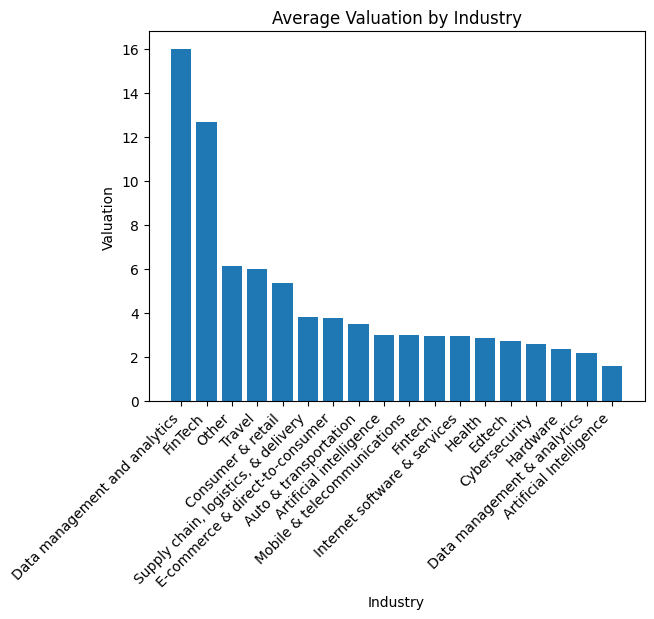

In [66]:
max_valuation_NorthAmerica = data_NorthAmerica.groupby('Industry')['Valuation'].mean().sort_values(ascending=False)

plt.bar(max_valuation_NorthAmerica.index, max_valuation_NorthAmerica.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Valuation')
plt.title('Average Valuation by Industry')
plt.xlabel('Industry')
plt.show()

#### **Valuation vs Average Time taken to become Unicorn**

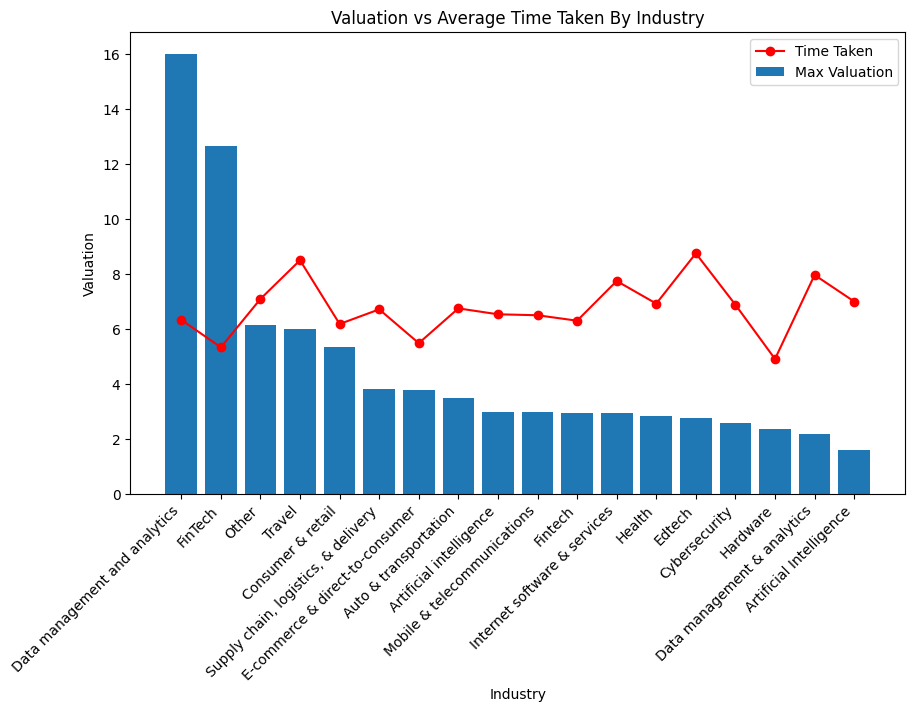

In [71]:
time_taken_NorthAmerica = time_taken_NorthAmerica.reindex(max_valuation_NorthAmerica.index)

plt.figure(figsize=(10, 6)) 


plt.bar(max_valuation_NorthAmerica.index, max_valuation_NorthAmerica.values, label='Max Valuation')


plt.plot(time_taken_NorthAmerica.index, time_taken_NorthAmerica.values, color='red', marker='o', linestyle='-', label='Time Taken')

plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Valuation')
plt.title('Valuation vs Average Time Taken By Industry')
plt.xlabel('Industry')


plt.legend()

plt.show()

## **<p align = "center"> Analysis for Asia </p>** 

#### **Time taken to become Unicorn per Industry**

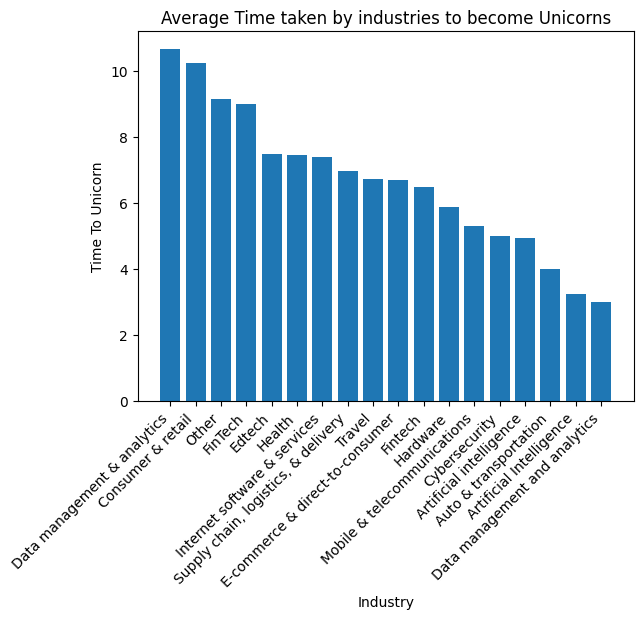

In [68]:
time_taken_Asia = data_Asia.groupby('Industry')['Time To Unicorn'].mean().sort_values(ascending=False)


plt.bar(time_taken_Asia.index, time_taken_Asia.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Time To Unicorn')
plt.title('Average Time taken by industries to become Unicorns')
plt.xlabel('Industry')
plt.show()

#### **Average valuation of Industry**

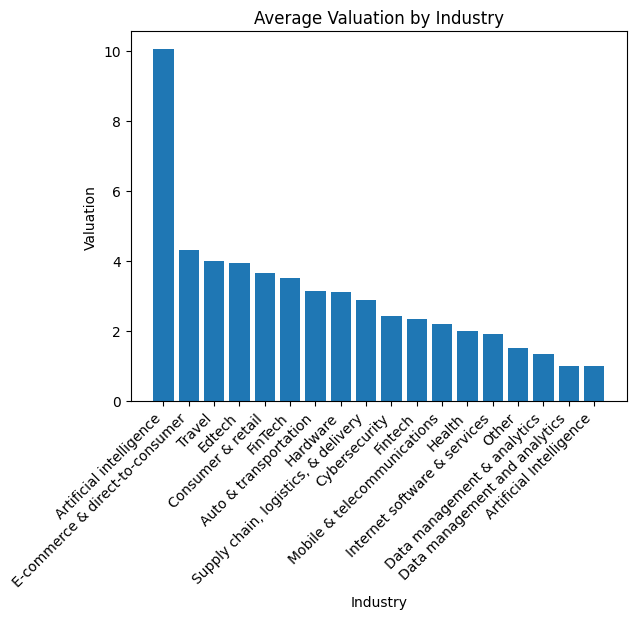

In [69]:
max_valuation_Asia = data_Asia.groupby('Industry')['Valuation'].mean().sort_values(ascending=False)

plt.bar(max_valuation_Asia.index, max_valuation_Asia.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Valuation')
plt.title('Average Valuation by Industry')
plt.xlabel('Industry')
plt.show()

#### **Valuation vs Average Time take to become Unicorn**

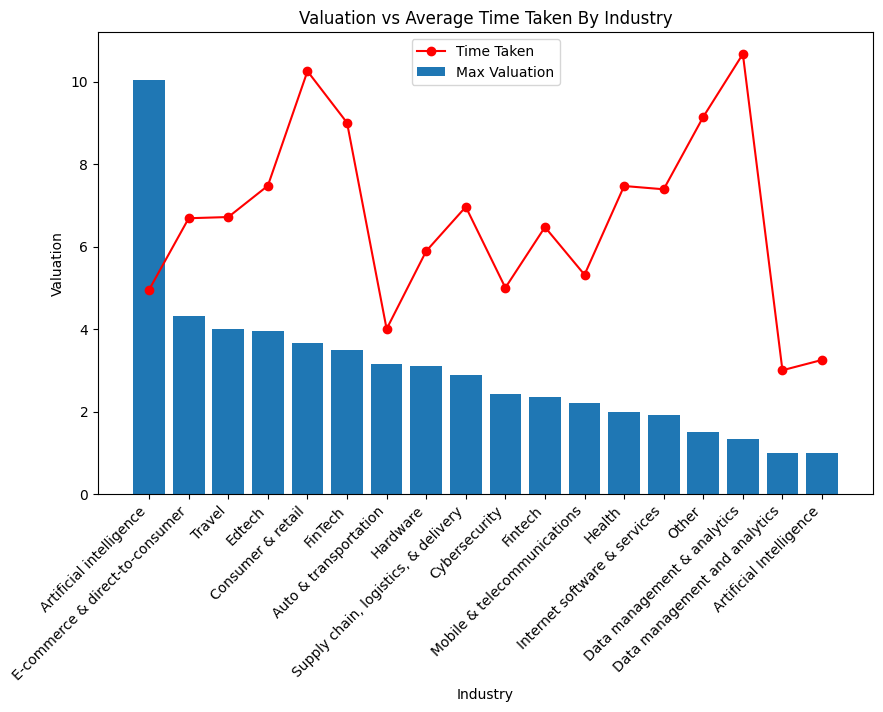

In [73]:
time_taken_Asia = time_taken_Asia.reindex(max_valuation_Asia.index)

plt.figure(figsize=(10, 6)) 


plt.bar(max_valuation_Asia.index, max_valuation_Asia.values, label='Max Valuation')


plt.plot(time_taken_Asia.index, time_taken_Asia.values, color='red', marker='o', linestyle='-', label='Time Taken')

plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Valuation')
plt.title('Valuation vs Average Time Taken By Industry')
plt.xlabel('Industry')


plt.legend()

plt.show()

## **<p align = "center"> Analysis for Europe </p>**

#### **Time taken to become Unicorn per Industry**

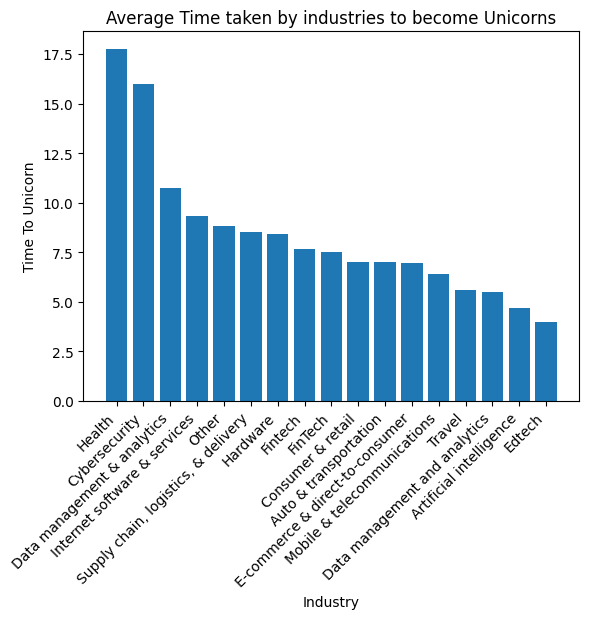

In [72]:
time_taken_Europe = data_Europe.groupby('Industry')['Time To Unicorn'].mean().sort_values(ascending=False)


plt.bar(time_taken_Europe.index, time_taken_Europe.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Time To Unicorn')
plt.title('Average Time taken by industries to become Unicorns')
plt.xlabel('Industry')
plt.show()

### **Average Valuation of Industry**

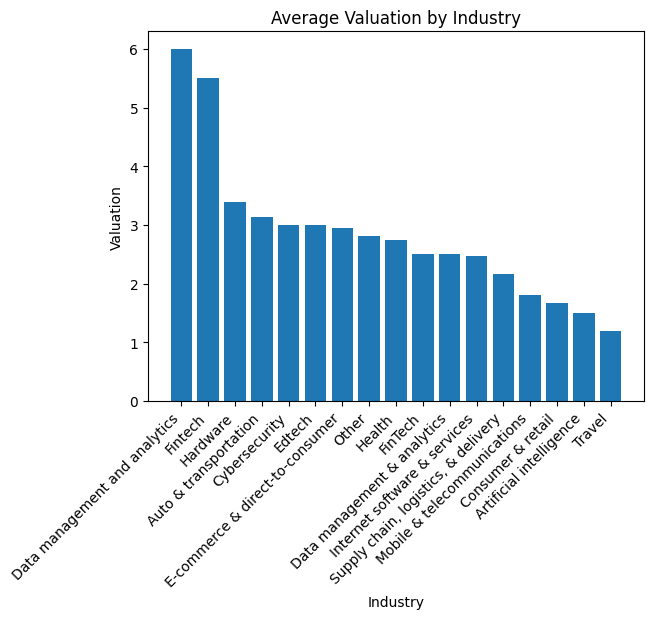

In [74]:
max_valuation_Europe = data_Europe.groupby('Industry')['Valuation'].mean().sort_values(ascending=False)

plt.bar(max_valuation_Europe.index, max_valuation_Europe.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Valuation')
plt.title('Average Valuation by Industry')
plt.xlabel('Industry')
plt.show()

### **Valuation vs Average Time taken to become Unicorn**

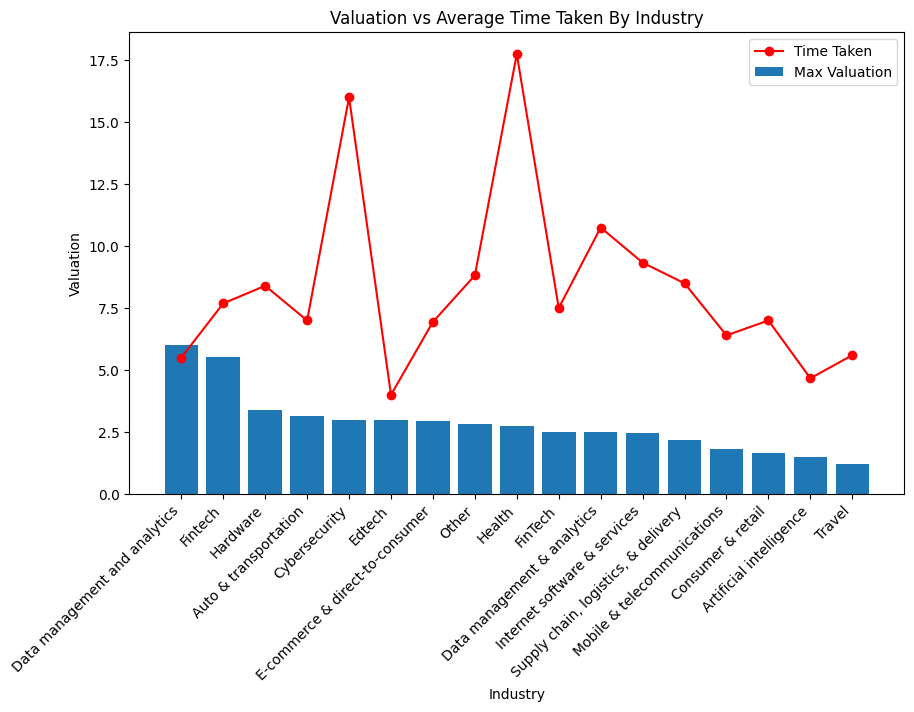

In [75]:
time_taken_Europe = time_taken_Europe.reindex(max_valuation_Europe.index)

plt.figure(figsize=(10, 6)) 


plt.bar(max_valuation_Europe.index, max_valuation_Europe.values, label='Max Valuation')


plt.plot(time_taken_Europe.index, time_taken_Europe.values, color='red', marker='o', linestyle='-', label='Time Taken')

plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Valuation')
plt.title('Valuation vs Average Time Taken By Industry')
plt.xlabel('Industry')


plt.legend()

plt.show()

## **<p align = "center"> Average Valuation(Global) vs Time Taken(Continent-wise)<p>**

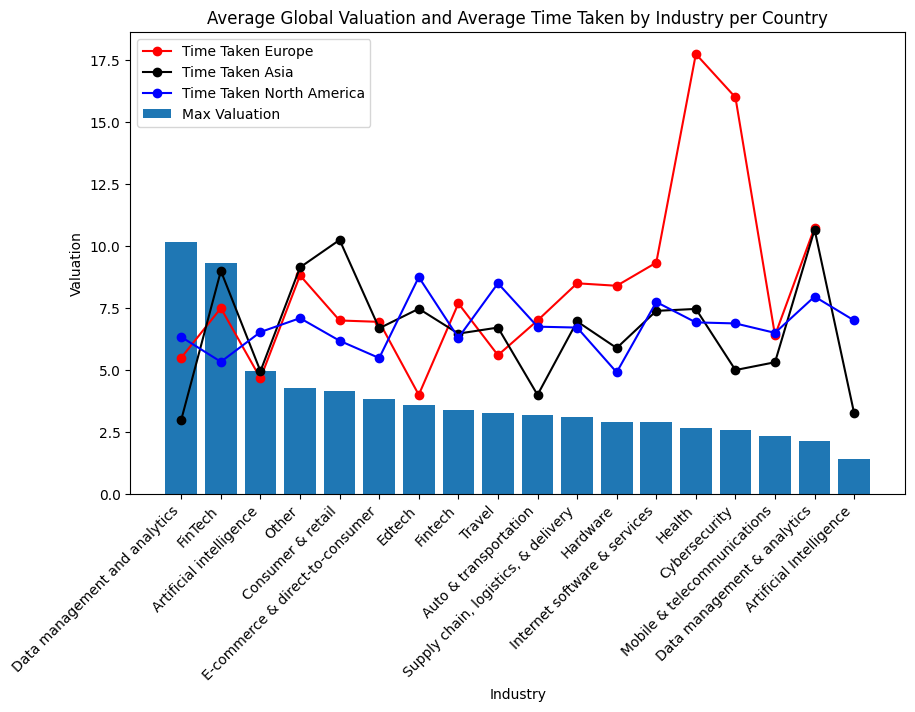

In [79]:

time_taken_Europe = time_taken_Europe.reindex(max_valuation.index)
time_taken_Asia = time_taken_Asia.reindex(max_valuation.index)
time_taken_NorthAmerica = time_taken_NorthAmerica.reindex(max_valuation.index)

plt.figure(figsize=(10, 6))  


plt.bar(max_valuation.index, max_valuation.values, label='Max Valuation')


plt.plot(time_taken_Europe.index, time_taken_Europe.values, color='red', marker='o', linestyle='-', label='Time Taken Europe')
plt.plot(time_taken_Asia.index, time_taken_Asia.values, color='black', marker='o', linestyle='-', label='Time Taken Asia')
plt.plot(time_taken_NorthAmerica.index, time_taken_NorthAmerica.values, color='blue', marker='o', linestyle='-', label='Time Taken North America')

plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Valuation')
plt.title('Average Global Valuation and Average Time Taken by Industry per Country')
plt.xlabel('Industry')


plt.legend()

plt.show()